## Statistics Game Logo (R) - Ethan, Molly, and Ian

In the following cells, a logo for our game, `[GAME NAME]`, will be created.

### 1.0 - Install and Load the Necessary Packages
We use `ggplot2` and `dplyr` from `tidyverse`, as well as `geomtextpath`.

*Note: we should confirm with Kalim in-person if it is alright to install `geomtextpath`.*

In [5]:
# Install and load the libraries
install.packages(c('tidyverse', 'geomtextpath'), repos='https://cran.microsoft.com')

library(ggplot2)
library(dplyr)
library(geomtextpath)

Warning message:
"package 'geomtextpath' is in use and will not be installed"
Installing package into 'C:/Users/ethan/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ethan\AppData\Local\Temp\RtmpgRGXaS\downloaded_packages


### 2.0 - Create Plot Data Vectors
This is where the main pattern data is created (this will of course be adjusted!).

In [6]:
# Define the number of points
points <- 2000

# Define the angle
angle <- pi/2 + 0.001

# Spiral dataset
t <- (1:points) * angle
x_spiral <- cos(t)
y_spiral <- sin(t)

# Half-circle top dataset
r <- 750
x_temp <- seq(-r, r)
x_circle <- x_temp * 1.25 # stretch x values
y_circle <- sqrt(r^2 - x_temp^2) - 200

# Half-circle bottom
y_circle_b <- -sqrt(r^2 - x_temp^2) + 200

# Eye parabola top section dataset
x_temp <- -18:18
x_par <- x_temp * 35 # stretch x values
y_par <- -x_temp^2 + 324

# Bottom of eye parabola
y_par_b <- x_temp^2 - 324

# Create dataframes
spiral <- data.frame(t, x_spiral, y_spiral)
circle <- data.frame(x_circle, y_circle, y_circle_b)
eye <- data.frame(x_par, y_par, y_par_b)

### 2.1 - Create Theme Object to Remove Unwanted Plot Features
This code stores the removal information for the plot in a `theme()` object for later use. <br>
The object sets the background to white, and removes the grid, ticks, text, and titles.

In [7]:
# Object containing plot theme settings to remove axes, labels, etc.
remove_axes <- theme(panel.background = element_rect(fill='white'),
                     panel.grid = element_blank(),
                     axis.ticks = element_blank(),
                     axis.title = element_blank(),
                     axis.text = element_blank())

### 2.2 - Create Plot
This is an exapmle and will also get heavily adjusted.<br><br>
The current example logo is created as follows:
1. Remove unnecessary axes, labels, etc. from the plot.
2. Plot the spiral pattern using the `spiral` dataframe and a `geom_point()` layer.
3. Plot the top half of the eye using part of the `eye` dataframe and a `geom_path()` layer.
4. Plot the bottom half of the eye.
5. Plot the center of the eye as a single, large point.
6. Plot the word "SECOND" curved above the eye using the `circle` dataframe and `geom_textpath()`.
    - The text will follow the curve of a circle that isn't shown. 
7. Plot the word "SIGHT" curved below the eye. 


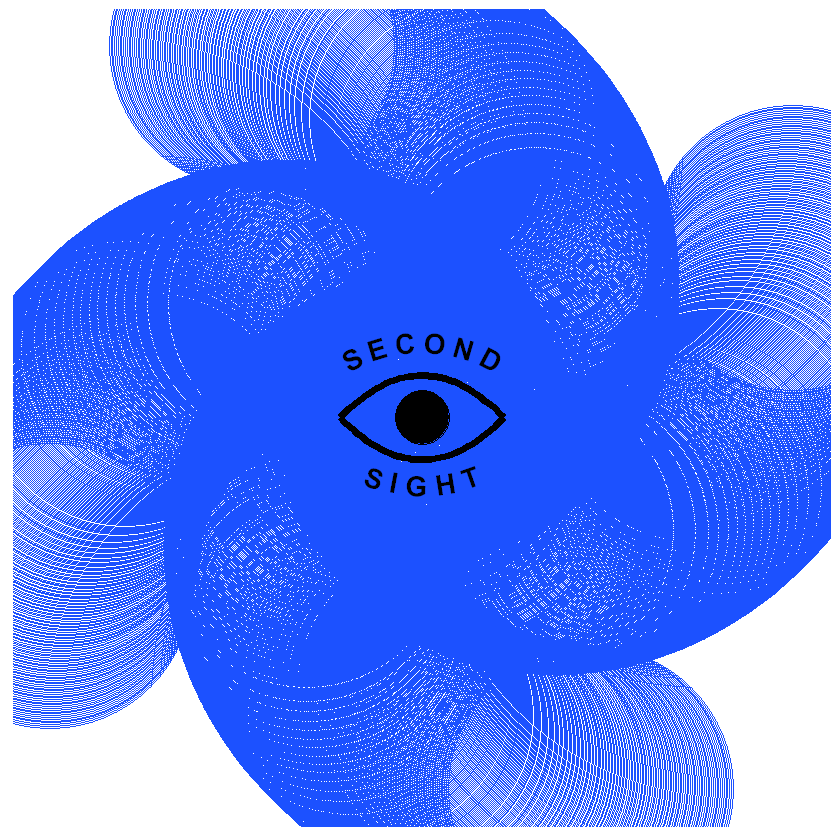

In [9]:
# Make the plot with ggplot2
plt <- ggplot() +
    # Remove axes, labels, etc.
    remove_axes + 

    # Points layer 1 using spiral dataframe
    geom_point(data = spiral, aes(x_spiral*t, y_spiral*t), 
               size = 80, alpha = t, shape = 1, color = "#1c51ff") + 
    
    # Eye parabola top layer
    geom_path(data = eye, aes(x_par, y_par),
              linewidth = 2) + 
    # Eye parabola bottom layer
    geom_path(data = eye, aes(x_par, y_par_b),
              linewidth = 2) +
    
    # Eye center
    geom_point(aes(0,0), size=15) +
    
    # Upper curved text layer using half-circle dataframe
    geom_textpath(data = circle, aes(x_circle, y_circle), 
                  size = 6, label = "S E C O N D", 
                  text_only = TRUE, fontface = "bold") +
    # Lower curved text
    geom_textpath(data = circle, aes(x_circle, y_circle_b), 
                  size = 6, label = "S I G H T", 
                  text_only = TRUE, fontface = "bold")

# Show plot
plt